# Gaussian Naive Bayes Algorithm on Iris Dataset

This implementation utilizes the Gaussian Naive Bayes algorithm, which is well-suited for our dataset.

**How to run the program:**
*  **Download the Dataset:** Obtain the dataset from Kaggle (https://www.kaggle.com/datasets/saurabh00007/iriscsv)
* **Import the Dataset:** Upload the downloaded CSV file to the Files tab on the right side of the screen in your development environment.
*   **Run the Program**: Execute the code sequentially to see the results.

**Step 1** : Import all necessary packages from various sources.
It also includes a utility function to format the display of results.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


def showResults(filters=None):
    if filters is None or not filters:
        filters = ['classification_report', 'accuracy', 'confusion_matrix']

    if 'accuracy' in filters:
        print("Accuracy:", accuracy_score(y_test, y_pred))

    if 'confusion_matrix' in filters:
        plt.figure(figsize=(4, 4))
        plt.rc('font', size=8)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                    xticklabels=gnb.classes_, yticklabels=gnb.classes_)
        plt.xlabel('Predicted', fontweight='bold')
        plt.ylabel('Actual', fontweight='bold')
        plt.title('Confusion Matrix', fontweight='bold')
        plt.show()

    if 'classification_report' in filters:
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

**Step 2** : Read the dataset and define what columns(continuous) are included.


In [ ]:
url = "./Iris.csv"
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data = pd.read_csv(url, header=0)
X = data[column_names]

**Step 3** : We use Gaussian, so normalization is necessary. After that, the dataset is split from train to test. Ignore the SettingWithCopyWarning

In [ ]:
X.loc[:, column_names] = X.loc[:, column_names].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# X is already defined on step 2
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

<ipython-input-62-312ba90091d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, column_names] = X.loc[:, column_names].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


**Step 4** : Perform Gaussian Naive Bayes & display result.


Accuracy: 0.9666666666666667


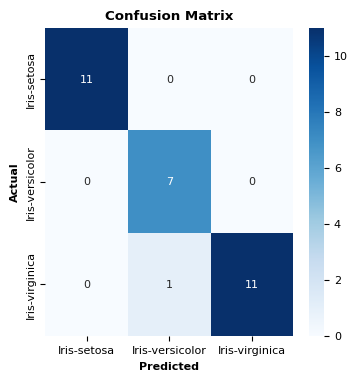

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

showResults()

**Overall Code**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


def showResults(filters=None):
    if filters is None or not filters:
        filters = ['classification_report', 'accuracy', 'confusion_matrix']

    if 'accuracy' in filters:
        print("Accuracy:", accuracy_score(y_test, y_pred))

    if 'confusion_matrix' in filters:
        plt.figure(figsize=(4, 4))
        plt.rc('font', size=8)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                    xticklabels=gnb.classes_, yticklabels=gnb.classes_)
        plt.xlabel('Predicted', fontweight='bold')
        plt.ylabel('Actual', fontweight='bold')
        plt.title('Confusion Matrix', fontweight='bold')
        plt.show()

    if 'classification_report' in filters:
        print("Classification Report:")
        print(classification_report(y_test, y_pred))


url = "./Iris.csv"
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data = pd.read_csv(url, header=0)
X = data[column_names]

X.loc[:, column_names] = X.loc[:, column_names].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# X is already defined on step 2
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

showResults()